# *Fresh Beauty Report:*

1. Apresentação da empresa
2. Sobre o caso de estudo
3. Preparação de dados (ETL) 
4. Análise exploratória
5. Visualização Gráfica de Dados
6. Modelagem Preditiva
6. Bibliografia de apoio

__________________________________________________________________________


## 1. SusuBank - Apresentação 

![Intro_page.png](https://drive.google.com/uc?export=view&id=1sPToFxz3xhRD7GoCdv0nhV3ZBD3WEvSc)










(Imagem criada em Canva.com)



__________________________________________________________________________

## 2. Sobre o caso de estudo:
Nesse notebook, expomos um caso específico comum ao nosso dia a dia de consultoria. No caso em questão, temos um cliente, a Fresh Beauty, uma empresa do interior dos Estados Unidos, que nos procurou em 2019 e relatou o interesse em produzir uma nova linha de cosméticos naturais à base de abacate.

Na mesma época e para sua surpresa, a Fresh Beauty recebeu a oferta de fusão com uma importante empresa agrícola especializada na produção e venda de abacates, que soube do interesse da nossa cliente numa nova linha de produtos e viu na situação uma oportunidade de explorar um novo segmento.

Contudo, nosso cliente ainda se sente inseguro sobre se compensa fazer essa fusão. Será que vale a pena todo um esforço só por causa de abacates? Desconsiderando, por hora, toda a complexidade do processo de M&A, a Fresh Beauty nos entrega uma planilha fornecida pela empresa agrícola e pergunta: Em que circunstâncias se encontra a venda de abacates no momento? Há boas perspectivas futuras?


__________________________________________________________________________

## 3. Preparação de dados

3.1 Extração

In [1]:
# Importando as bibliotecas necessárias 
import pandas as pd           # Renomeando a biblioteca pandas para pd
import numpy as np            # Renomeando a biblioteca numpy para np

In [ ]:
pip install pandera           # instalação de biblioteca

In [3]:
import pandera as pa          # Renomeando a biblioteca pandera para pa

In [4]:
# fazendo leitura do dataset fornecido
# atribuindo o arquivo a uma variável chamada df (redução de DataFrame)
df = pd.read_csv('/content/avocado.csv', sep = ',', index_col = 0)

In [6]:
# lendo dez primeiras linhas
df.head(10)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


Descrição de cada coluna

*   `Date`: data de observação
*   `AveragePrice`: preço médio unitário do abacate 
*   `Total Volume`: total de abacates vendidos (em oz)
*   `4046`: total de abacates não-orgânicos de tamanho pequeno/médio (PLU 4046) vendidos (em oz)
*   `4225`: total de abacates não-orgânicos de tamanho grande (PLU 4225) vendidos (em oz)
*   `4770`: total de abacates não-orgânicos de tamanho extra grande (PLU 4770) vendidos (em oz)
*   `type`: tipo de abacate (convencional ou orgânico) 
*   `year`: ano
*   `region`: região ou cidade sobre as quais os dados foram coletados

In [7]:
# evitando notação científica no output de informações estatísticas
pd.options.display.float_format = '{:20,.2f}'.format

# descrição estatística
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,"18,249.00","18,249.00","18,249.00","18,249.00","18,249.00","18,249.00","18,249.00","18,249.00","18,249.00","18,249.00"
mean,1.41,"850,644.01","293,008.42","295,154.57","22,839.74","239,639.20","182,194.69","54,338.09","3,106.43","2,016.15"
std,0.40,"3,453,545.36","1,264,989.08","1,204,120.40","107,464.07","986,242.40","746,178.51","243,965.96","17,692.89",0.94
min,0.44,84.56,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"2,015.00"
25%,1.10,"10,838.58",854.07,"3,008.78",0.00,"5,088.64","2,849.42",127.47,0.00,"2,015.00"
50%,1.37,"107,376.76","8,645.30","29,061.02",184.99,"39,743.83","26,362.82","2,647.71",0.00,"2,016.00"
75%,1.66,"432,962.29","111,020.20","150,206.86","6,243.42","110,783.37","83,337.67","22,029.25",132.50,"2,017.00"
max,3.25,"62,505,646.52","22,743,616.17","20,470,572.61","2,546,439.11","19,373,134.37","13,384,586.80","5,719,096.61","551,693.65","2,018.00"


In [8]:
# tamanho do dataframe (linhas, colunas)
df.shape

(18249, 13)

In [9]:
# identificando se há falta de dados no dataset (valores nulos)
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [10]:
# informações gerais sobre as colunas: tipo de dado, total de entradas
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 11
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.9+ MB


3.2 Validação

In [11]:
# esquema a ser validado
schema = pa.DataFrameSchema(
    columns = {
        'Date': pa.Column(pa.String),
        'AveragePrice': pa.Column(pa.Float),
        'Total Volume': pa.Column(pa.Float),
        '4046': pa.Column(pa.Float),
        '4225': pa.Column(pa.Float),
        '4770': pa.Column(pa.Float),
        'Total Bags': pa.Column(pa.Float),
        'Small Bags': pa.Column(pa.Float),
        'Large Bags': pa.Column(pa.Float),
        'XLarge Bags': pa.Column(pa.Float),
        'type': pa.Column(pa.String),
        'year': pa.Column(pa.Int),
        'region': pa.Column(pa.String)
    }
)

# note que os dados definidos como float referem-se a preços e medidas
# (total de abacates em oz) 
schema.validate(df)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,"64,236.62","1,036.74","54,454.85",48.16,"8,696.87","8,603.62",93.25,0.00,conventional,2015,Albany
1,2015-12-20,1.35,"54,876.98",674.28,"44,638.81",58.33,"9,505.56","9,408.07",97.49,0.00,conventional,2015,Albany
2,2015-12-13,0.93,"118,220.22",794.70,"109,149.67",130.50,"8,145.35","8,042.21",103.14,0.00,conventional,2015,Albany
3,2015-12-06,1.08,"78,992.15","1,132.00","71,976.41",72.58,"5,811.16","5,677.40",133.76,0.00,conventional,2015,Albany
4,2015-11-29,1.28,"51,039.60",941.48,"43,838.39",75.78,"6,183.95","5,986.26",197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,2018-02-04,1.63,"17,074.83","2,046.96","1,529.20",0.00,"13,498.67","13,066.82",431.85,0.00,organic,2018,WestTexNewMexico
8,2018-01-28,1.71,"13,888.04","1,191.70","3,431.50",0.00,"9,264.84","8,940.04",324.80,0.00,organic,2018,WestTexNewMexico
9,2018-01-21,1.87,"13,766.76","1,191.92","2,452.79",727.94,"9,394.11","9,351.80",42.31,0.00,organic,2018,WestTexNewMexico
10,2018-01-14,1.93,"16,205.22","1,527.63","2,981.04",727.01,"10,969.54","10,919.54",50.00,0.00,organic,2018,WestTexNewMexico


3.3 Transformação

In [12]:
# renomeando as colunas cujo nome refere-se ao código de 
# identificação do tipo de abacate e nomeado a coluna
# referenta ao id da linha
df = df.rename(columns = {'4046': 'PLU 4046',
                          '4225': 'PLU 4225',
                          '4770': 'PLU 4770',
                          'type': 'Type',
                          'year': 'Year',
                          'region': 'Region'
                          }
               )
df.head(1)

,Date,AveragePrice,Total Volume,PLU 4046,PLU 4225,PLU 4770,Total Bags,Small Bags,Large Bags,XLarge Bags,Type,Year,Region
0,2015-12-27,1.33,"64,236.62","1,036.74","54,454.85",48.16,"8,696.87","8,603.62",93.25,0.00,conventional,2015,Albany


In [13]:
# remove linhas duplicadas
df.drop_duplicates(inplace = True)

In [14]:
# convertendo a coluna Date de string para DateTime
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')
df.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
PLU 4046               float64
PLU 4225               float64
PLU 4770               float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
Type                    object
Year                     int64
Region                  object
dtype: object

__________________________________________________________________________

## 4. Análise exploratória


4.1 Situação atual da venda de abacates

In [15]:
# Os dados correspondem a informações de quais anos?
df['Year'].unique()

array([2015, 2016, 2017, 2018])

In [16]:
# Qual o volume total de vendas (em oz) de abacate por cada tipo?
df.groupby('Type')['Total Volume'].sum().reset_index()

,Type,Total Volume
0,conventional,"15,087,220,911.31"
1,organic,"436,181,682.09"


* Pode-se notar que o abacate convencional é o mais vendido, ele se sobressai por uma diferença de aproximadamente 14.651.039.229 oz de vendas a mais.

In [17]:
# Qual o volume total de vendas (em oz) por cada ano? 
df.groupby('Year')['Total Volume'].sum().sort_values(ascending = False).reset_index()

,Year,Total Volume
0,2017,"4,934,305,699.27"
1,2016,"4,820,889,891.83"
2,2015,"4,385,468,662.04"
3,2018,"1,382,738,340.26"


* Observamos que o ano com mais vendas é 2017 e que 2018 é aquele com o menor volume total de vendas. Além disso, podemos notar que de 2015 a 2017 houve um crescimento gradual de vendas e que, porém, em 2018 houve uma queda considerável comparada à variação dos anos anteriores que girava em torno de 4 bilhões de oz.

In [18]:
# Qual o volume total de vendas (em oz) de cada abacate do tipo convencional?
print(round(df['PLU 4046'].sum(), 2))        # abacate pequeno/médio 
print(round(df['PLU 4225'].sum(), 2))        # abacate grande
print(round(df['PLU 4770'].sum(), 2))        # abacate extra grande

5347110739.26
5386275717.93
416802342.13


* Entre os abacates do tipo convencional o abacate extra grande é o menos vendido enquanto quem se destaca como mais vendido é o abacate grande. Vale notar também que é pequena a vantagem que o abacate grande leva sobre o abacate pequeno/médio.

In [19]:
# Qual o total de vendas (em oz) de cada tipo de saco de abacate?
print(round(df['Small Bags'].sum(), 2))         # saco pequeno
print(round(df['Large Bags'].sum(), 2))         # saco grande
print(round(df['XLarge Bags'].sum(), 2))        # saco extra grande

3324870837.51
991615770.55
56689177.33


* Considerando ambos convencional e orgânico na análise, temos que o saco pequeno é o mais vendido e o saco extra grande é o menos procurado. 

In [20]:
# Quais são as médias mínima e máxima do preço unitário de abacate
print(df.groupby('Type')['AveragePrice'].min().reset_index())
print(df.groupby('Type')['AveragePrice'].max().reset_index())

           Type         AveragePrice
0  conventional                 0.46
1       organic                 0.44
           Type         AveragePrice
0  conventional                 2.22
1       organic                 3.25


Considerando o já observado preço médio geral de 1.41 (média geral da coluna AveragePrice), podemos observar que separando por tipo de abacate temos números bastante divergentes da média geral.
Além disso, observa-se que o abacate orgânico é aquele que conseguiu atingir tanto o menor preço (0.44) de venda quanto o mais alto (3.25).


In [21]:
# Qual o volume total (em oz) de abacates vendidos por região?
df.groupby('Region')['Total Volume'].sum().sort_values(ascending = False)

Region
TotalUS                   5,864,740,181.80
West                      1,086,779,155.75
California                1,028,981,653.17
SouthCentral              1,011,279,618.83
Northeast                   713,280,909.56
Southeast                   615,238,409.11
GreatLakes                  589,642,549.29
Midsouth                    508,349,357.20
LosAngeles                  507,896,547.63
Plains                      311,188,529.11
NewYork                     240,734,127.53
DallasFtWorth               208,419,286.55
Houston                     203,167,867.80
PhoenixTucson               195,643,312.50
WestTexNewMexico            144,521,839.78
Denver                      138,902,535.99
SanFrancisco                135,830,191.78
BaltimoreWashington         134,713,919.32
Chicago                     133,702,338.51
Portland                    110,552,211.60
Seattle                     109,214,177.96
MiamiFtLauderdale            97,673,224.03
Boston                       97,273,984.83
SanD

* A região da costa oeste, incluindo California, além da região centro-sul são os locais com maior volume total de vendas de abacate. Uma curiosidade sobre esses dados é que, mesmo considerando o fato de que New York, Los Angeles e Chicago são as cidades mais populosas dos EUA, a compra de abacate nessas regiões não tem destaque.

In [22]:
# Quais são o preço médio unitário e o total de sacos (em oz) de abacate
# vendidos durante um mês de inverno rigoroso?

# tomando janeiro de 2016 como amostra
yearFilter = df.Date.dt.year == 2016
monthFilter = df.Date.dt.month == 1 

# filtrando as colunas desejadas 
avPriceFilter = df['AveragePrice']
totalBagsFilter = df['Total Bags']

# localizando dados filtrados
df.loc[yearFilter & monthFilter & avPriceFilter & totalBagsFilter]


,Date,AveragePrice,Total Volume,PLU 4046,PLU 4225,PLU 4770,Total Bags,Small Bags,Large Bags,XLarge Bags,Type,Year,Region
47,2016-01-31,1.16,"102,038.32","1,386.24","79,881.67",69.46,"20,700.95","19,788.78",912.17,0.00,conventional,2016,Albany
48,2016-01-24,1.22,"96,089.13",545.37,"70,802.56",68.41,"24,672.79","23,926.35",746.44,0.00,conventional,2016,Albany
49,2016-01-17,1.26,"119,972.41","1,202.52","100,613.46",51.22,"18,105.21","17,980.53",124.68,0.00,conventional,2016,Albany
50,2016-01-10,1.28,"79,121.77",848.19,"66,696.97",109.08,"11,467.53","11,293.65",173.88,0.00,conventional,2016,Albany
51,2016-01-03,1.03,"149,038.15",939.71,"139,735.90",132.35,"8,230.19","8,056.43",173.76,0.00,conventional,2016,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47,2016-01-31,1.64,"11,626.56","1,618.90","4,032.03",2.34,"5,973.29","5,957.67",15.62,0.00,organic,2016,WestTexNewMexico
48,2016-01-24,1.47,"12,171.04","1,554.09","4,656.41",9.36,"5,951.18","5,852.36",98.82,0.00,organic,2016,WestTexNewMexico
49,2016-01-17,1.45,"13,237.48","1,912.60","4,779.17",25.72,"6,519.99","6,447.25",72.74,0.00,organic,2016,WestTexNewMexico
50,2016-01-10,1.37,"12,647.90","1,591.60","4,070.29",23.41,"6,962.60","6,780.56",182.04,0.00,organic,2016,WestTexNewMexico


* Observa-se que há bastantes registros (540 linhas) relatando a venda de abacates no mês de janeiro. Isso pode nos indicar que a busca por abacates é grande mesmo na estação do ano em que sabores refrescantes não são destaque.

In [23]:
# Há registros de venda no Dia Nacional do Abacate?

# filtrando a data do Dia Nacional do Abacate.
# 31 de Julho
monthFilter = df.Date.dt.month == 7
dayFilter = df.Date.dt.year == 31

# localizando dados filtrados
df.loc[monthFilter & dayFilter]

,Date,AveragePrice,Total Volume,PLU 4046,PLU 4225,PLU 4770,Total Bags,Small Bags,Large Bags,XLarge Bags,Type,Year,Region


* Sem registros sobre essa data.


In [24]:
# Há quantos registros sobre cada região?

df['Region'].value_counts() 

Orlando                338
Denver                 338
NewOrleansMobile       338
Boston                 338
TotalUS                338
Atlanta                338
GrandRapids            338
Sacramento             338
HartfordSpringfield    338
Detroit                338
Syracuse               338
Roanoke                338
Pittsburgh             338
NewYork                338
California             338
Midsouth               338
RaleighGreensboro      338
Philadelphia           338
NorthernNewEngland     338
BuffaloRochester       338
SanDiego               338
PhoenixTucson          338
CincinnatiDayton       338
Northeast              338
GreatLakes             338
Louisville             338
Boise                  338
LasVegas               338
Tampa                  338
HarrisburgScranton     338
Seattle                338
SanFrancisco           338
RichmondNorfolk        338
DallasFtWorth          338
Jacksonville           338
Nashville              338
Charlotte              338
A

* Há igualmente 338 registros sobre todas as regiões em que há vendas, exceto uma pequena diferença: três registros de venda a menos na região de New Mexico/Oeste do Texas.

In [25]:
# Qual é o top 3 regiões que mais compram sacos extra grandes?

# agrupando por região
groupedData = df.groupby('Region')['XLarge Bags'].sum()
groupedData.nlargest(4, 'first').reset_index()

,Region,XLarge Bags
0,TotalUS,"21,455,230.54"
1,GreatLakes,"6,392,523.96"
2,California,"5,272,577.91"
3,LosAngeles,"4,075,279.95"


* As regiões que mais compram sacos extra grandes de abacate são a região dos Grandes Lagos (noroeste do país) e as regiões costeiras de Los Angeles e California. 

__________________________________________________________________________

## 5. Visualização Gráfica de Dados

In [26]:
# importando biblioteca de visualização
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline
plt.rcParams.update({'figure.max_open_warning': 0})

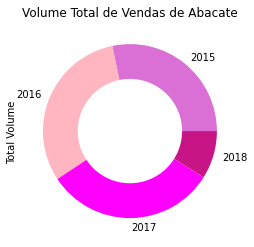

In [27]:
# gráfico do volume total de vendas de abacate por ano

# customização - cores
colors = ['orchid', 'lightpink', 'magenta', 'mediumvioletred']
  
# criando gráfico de pizza
df.groupby(df['Year'])['Total Volume'].sum().plot.pie(colors = colors)

# customização - transformando em rosquinha
# criando círculo
centre_circle = plt.Circle((0, 0), 0.60, fc = 'white')
fig = plt.gcf()
  
# adicionando círculo no gráfico
fig.gca().add_artist(centre_circle)
  
# adicionando título 
plt.title('Volume Total de Vendas de Abacate')
  
# Displaing Chart
plt.show();

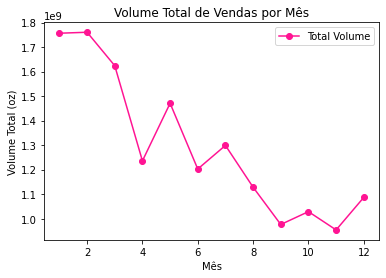

In [28]:
# gráfico do volume total de vendas (em oz) por mês

df.groupby(df['Date'].dt.month)['Total Volume'].sum().plot(marker = 'o', color = 'deeppink')

plt.title('Volume Total de Vendas por Mês')      # adicionando título
plt.xlabel('Mês')                                # adicionando legenda do eixo x
plt.ylabel('Volume Total (oz)')                  # adicionando legenda do eixo y
plt.legend();                                    # adicionando legenda

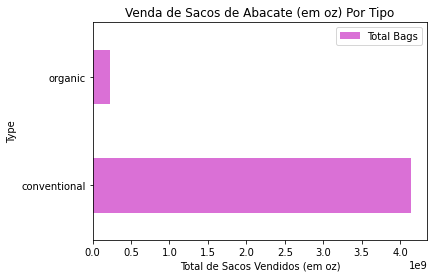

In [29]:
# gráfico da venda total de sacos de abacate (em oz) por tipo de abacate

# agrupando os dados que queremos plotar
totalBags_per_region = df.groupby(df['Type'])['Total Bags'].sum()

# adicionando título
plt.title('Venda de Sacos de Abacate por Tipo')  

# legendando eixos x e y
plt.xlabel('Total de Sacos Vendidos (em oz)')
plt.ylabel('Tipo')

#alterando estilo
plt.style.use('seaborn-pastel')

# alterando cor e colocando legenda
totalBags_per_region.plot.barh(title = 'Venda de Sacos de Abacate (em oz) Por Tipo', color = 'orchid')
plt.legend();

KeyboardInterrupt: ignored

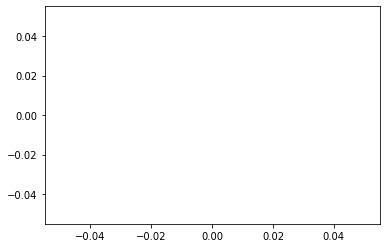

In [38]:
# Distribuição da Média de preços por ano

sns.lineplot(x = df['Year'], y = df['AveragePrice'], color = 'blueviolet')

plt.xlabel('Ano')
plt.ylabel('Preço Médio Unitário')
plt.title('Média de Preços Por Ano')

# apresentando gráfico criado
plt.show()

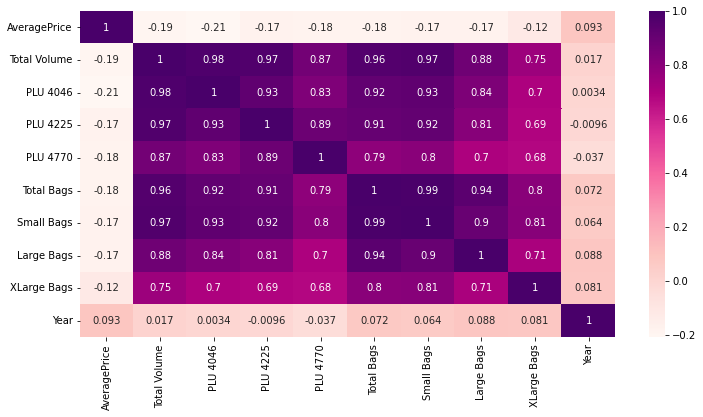

In [39]:
# gráfico Heat Map sobre o dataset completo
plt.figure(figsize=(12,6))

sns.heatmap(df.corr(),cmap='RdPu',annot=True);

__________________________________________________________________________

## 6. Modelagem Preditiva

O preço esperado do abacate orgânico para 2019 em todos os EUA : 1.519852 USD


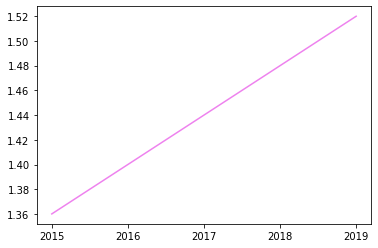

In [36]:
# Predição do preço de abacate para 2019

# importando biblioteca
from scipy import stats

# definindo parâmetros x e y para predição por regressão linear
X_lin = df['Year'].reset_index(drop = True)
y_lin = df['AveragePrice'].reset_index(drop = True)


slope, intercept, r, p, std_err = stats.linregress(X_lin, y_lin)  # scipy

def predicao(x):
  return slope * x + intercept

nome = 'Preço médio de abacate (orgânico) in 2019'
md = list(map(predicao, X_lin))  # scipy

X_pred_lin = 2019
y_pred_lin = predicao(X_pred_lin)

print('O preço esperado do abacate orgânico para 2019 em todos os EUA : %f USD' % y_pred_lin)

X_lin2 = X_lin.append(pd.Series(X_pred_lin))
y_lin2 = y_lin.append(pd.Series(y_pred_lin))
md2 = list(map(predicao, X_lin2)) 

# plotando o gráfico o preço médio modelado para 2019
plt.plot(X_lin2, md2, color = 'violet')
plt.xticks(np.arange(min(X_lin2), max(X_lin2 + 1), 1.0))
plt.show();


## 7. Bibliografia de Apoio

* *Hass Avocado Board (fonte real do dataset analisado) :* https://hassavocadoboard.com/
* *Guide to Defining Data Analytics Problem Statements:* https://medium.com/@vinitasilaparasetty/guide-to-defining-problem-statements-baf52219ea5b
* *Definição do Negócio - Missão, Visão e Valores:* https://www.sebrae.com.br/Sebrae/Portal%20Sebrae/Anexos/ME_Missao-Visao-Valores.PDF
* *National Avocado Day:* https://www.masslive.com/business/2021/07/national-avocado-day-2021-chipotle-offering-free-guacamole-on-saturday-deals-at-chosen-foods-and-pokeworks.html#:~:text=National%20Avocado%20Day%20is%20Saturday,and%20National%20Ice%20Cream%20Day.
* *Matplotlib Gallery:* https://matplotlib.org/stable/gallery/index.html
* *Seaborn Documentation:* https://seaborn.pydata.org/
* *List of United States cities by population:* https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population